In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart.csv")
df = df.drop(["oldpeak","slp","thall"], axis = 1)
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1
5,57,1,0,140,192,0,1,148,0,0,1
6,56,0,1,140,294,0,0,153,0,0,1
7,44,1,1,120,263,0,1,173,0,0,1
8,52,1,2,172,199,1,1,162,0,0,1
9,57,1,2,150,168,0,1,174,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trtbps    303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalachh  303 non-null    int64
 8   exng      303 non-null    int64
 9   caa       303 non-null    int64
 10  output    303 non-null    int64
dtypes: int64(11)
memory usage: 26.2 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
caa,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0


##### Bu kısımda kategorik değişkenlerle ilgili anlamlı bir sonuç çıkmaz.Yorumlar:
<br>
$Age$ = Düzgün bir dağılım
<br>
$Trtbps$ = %75 değeri min değere max'a olduğundan daha yakın, yani deneklerin büyük kısmında tansiyon sorunu yok. Yüksek olanlara özellikle bakılabilir
<br>
$chol$ = %75 değeri min değere max'a olduğundan daha yakın, yani deneklerin büyük kısmında kolesterol sorunu yok. Yüksek olanlara özellikle bakılabilir, tansiyonu ve kolesterolü yüksek olan kişiler aynı mı?
<br>
$thalachh$ = Düzgün bir dağılım

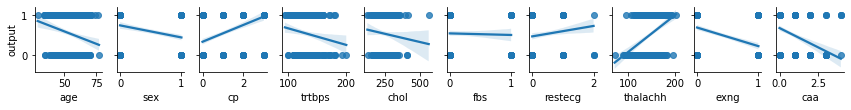

In [5]:
x0 = ["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh", "exng", "caa"]
y1 = ["output"]
 
sns.pairplot(df, x_vars=x0, y_vars=y1, kind = "reg", height=1.5, aspect=0.8)
plt.show()

In [6]:
corr = df.corr()
corr1 = corr["output"]
corr1.sort_values(ascending = False)

output      1.000000
cp          0.433798
thalachh    0.421741
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
caa        -0.391724
exng       -0.436757
Name: output, dtype: float64

### Veri Açıklaması

$age$ = Yaş 
<br>
$sex$ = Cinsiyet(0=Kadın---1=Erkek)
<br>
$exng$ = Egzersize bağlı angina(Göğüs ağrısı)(0=Yok, 1=Var)
<br>
$ca$ = Büyük kan damarları sayısı(0-3)
<br>
$cp$ = Göğüs ağrısı tipi(0 =Tipik angina, 1 = Atipik angina, 2 = Non-Angina, 3 = Asemptomatik)
<br>
$trtbps$ = Tansiyon(mm/Hg)
<br>
$chol$ = Kolesterol(mg/dl)
<br>
$fbs$ = Kan şekeri(120 mg/dl'den büyük mü)(0 = Hayır, 1 = Evet)
<br>
$restecg$ = EKG(Elektrokardiyagrafi) sonuçları(0 = Normal, 1 = ST-T Dalga anormalitesi, 2 = Olası sağ ventriküler büyümesi)
<br>
$thalach$ = Maksimum nabız
<br>
$output$ = Kriz geçmişi(0 = Geçirmedi, 1 = Geçirdi)

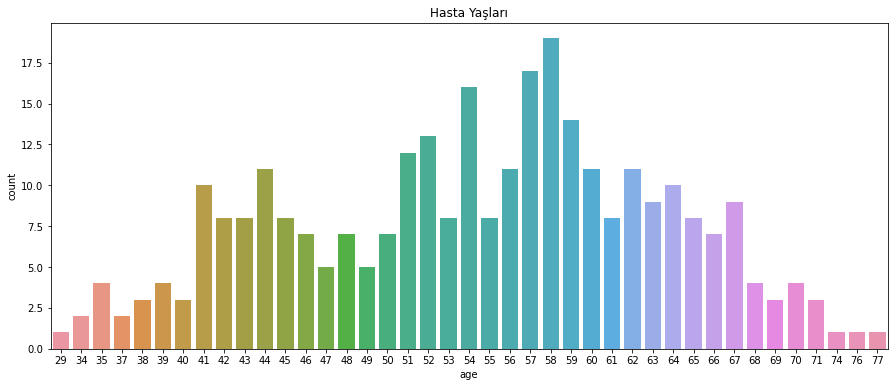

In [7]:
plt.figure(figsize = (15,6))
plt.title("Hasta Yaşları")
sns.countplot(x = "age", data = df);

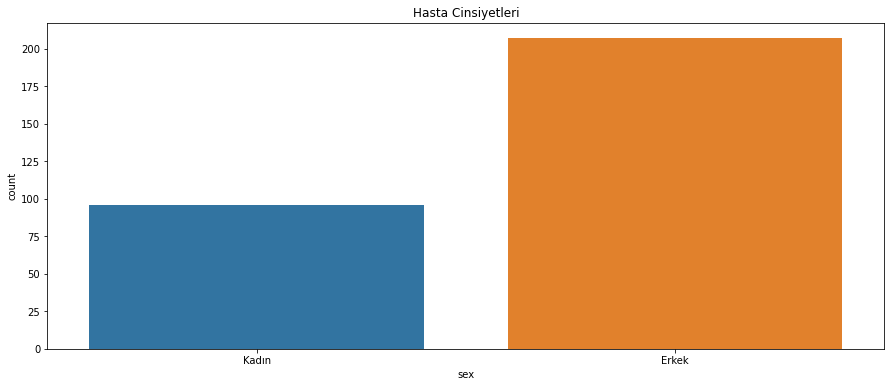

In [8]:
plt.figure(figsize = (15,6))
plt.title("Hasta Cinsiyetleri")
sns.countplot(x = "sex", data = df)
plt.xticks(ticks = [0, 1], labels = ["Kadın", "Erkek"])
plt.show()

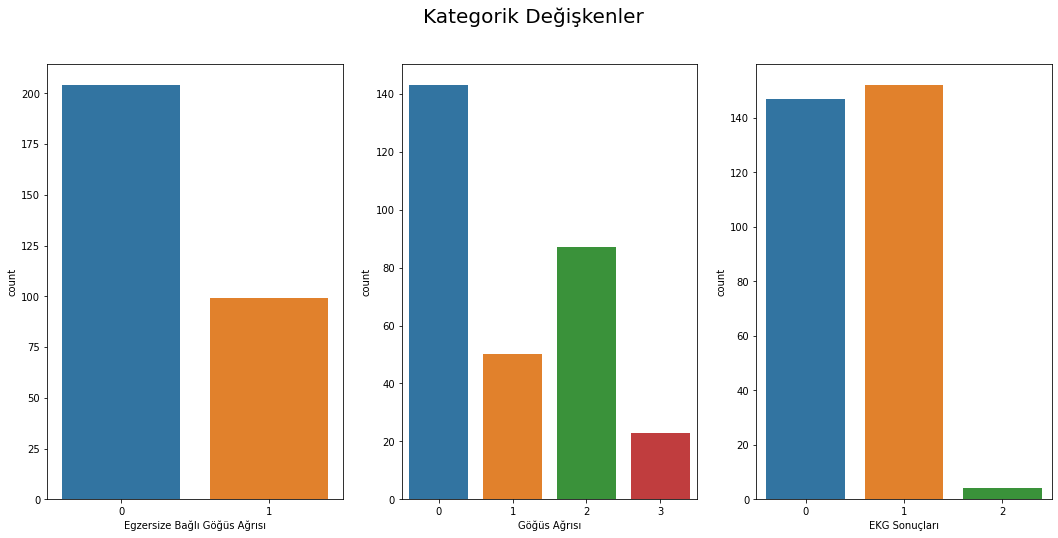

In [9]:
plt.figure(figsize = (18,8))
plt.suptitle("Kategorik Değişkenler", fontsize=20)
plt.subplot(1,3,1)
sns.countplot(x = "exng", data = df)
plt.xlabel("Egzersize Bağlı Göğüs Ağrısı")
plt.subplot(1,3,2)
sns.countplot(x = "cp", data = df)
plt.xlabel("Göğüs Ağrısı")
plt.subplot(1,3,3)
sns.countplot(x = "restecg", data = df)
plt.xlabel("EKG Sonuçları")
plt.show()

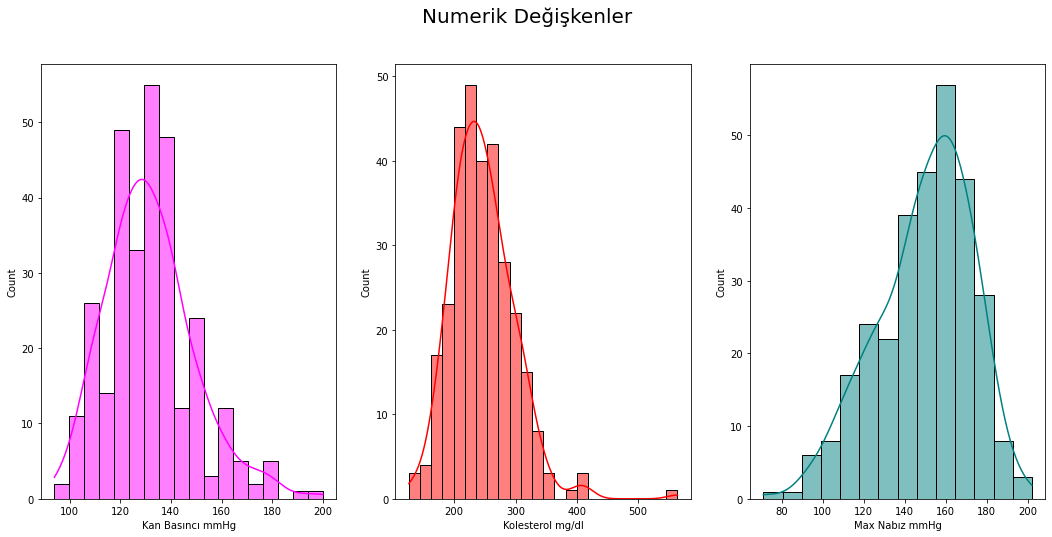

In [10]:
plt.figure(figsize = (18,8))
plt.suptitle("Numerik Değişkenler", fontsize=20)
plt.subplot(1,3,1)
sns.histplot(df["trtbps"], color = "magenta", kde = True)
plt.xlabel("Kan Basıncı mmHg")
plt.subplot(1,3,2)
sns.histplot(df["chol"], color = "red", kde = True)
plt.xlabel("Kolesterol mg/dl")
plt.subplot(1,3,3)
sns.histplot(df["thalachh"], color = "teal", kde = True)
plt.xlabel("Max Nabız mmHg")
plt.show()

# Model Oluşturma

### Scale-Split

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(df)
df_sc = scaler.transform(df)
df_sc = pd.DataFrame(df_sc, columns = ["yas", "cinsiyet", "g_agrisi", "tans", "kol", "kan_sekeri", "EKG", "nabiz", "eb_angina", "caa", "output"])
df_sc.head()

,yas,cinsiyet,g_agrisi,tans,kol,kan_sekeri,EKG,nabiz,eb_angina,caa,output
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429,0.914529


In [14]:
X = df_sc[["yas", "cinsiyet", "g_agrisi", "tans", "kol", "kan_sekeri", "EKG", "nabiz", "eb_angina", "caa"]]
y = df["output"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

### Logistic Regression

In [16]:
reg = LogisticRegression()

In [17]:
reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [18]:
reg.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred1 = reg.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[24,  7],
       [ 2, 28]], dtype=int64)

In [20]:
acc1 = accuracy_score(y_test, y_pred1)
print("Accuracy Score= %{}".format(acc1*100))

Accuracy Score= %85.24590163934425


#### Önem Düzeyleri

In [109]:
reg.coef_

array([[-0.06014163, -0.69962507,  0.7918431 , -0.39441677, -0.33800825,
         0.12461191,  0.17884279,  0.66787079, -0.61618139, -0.81953152]])

In [107]:
a = np.array([-0.06014163, -0.69962507,  0.7918431 , -0.39441677, -0.33800825,0.12461191,  0.17884279,  0.66787079, -0.61618139, -0.81953152])
type(a)

numpy.ndarray

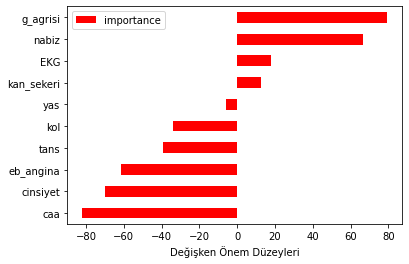

In [108]:
importance1 = pd.DataFrame({"importance" : a*100},
                         index = X_train.columns)
importance1.sort_values(by = "importance",
                      axis = 0,
                      ascending = True).plot(kind = "barh", color = "r")
plt.xlabel("Değişken Önem Düzeyleri")
plt.show()

### DecisionTreeClassifier

In [21]:
tree = DecisionTreeClassifier()

In [22]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [23]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
y_pred2 = tree.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[20, 11],
       [ 5, 25]], dtype=int64)

In [25]:
acc2 = accuracy_score(y_test, y_pred2)
print("Accuracy Score= %{}".format(acc2*100))

Accuracy Score= %73.77049180327869


#### Önem Düzeyleri

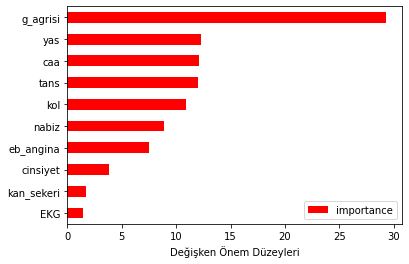

In [89]:
importance2 = pd.DataFrame({"importance" : tree.feature_importances_*100},
                         index = X_train.columns)
importance2.sort_values(by = "importance",
                      axis = 0,
                      ascending = True).plot(kind = "barh", color = "r")
plt.xlabel("Değişken Önem Düzeyleri")
plt.show()

### Random Forest

In [26]:
rf = RandomForestClassifier()

In [27]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [28]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
y_pred3 = rf.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred3)
cm3

array([[21, 10],
       [ 4, 26]], dtype=int64)

In [30]:
acc3 = accuracy_score(y_test, y_pred3)
print("Accuracy Score= %{}".format(acc3*100))

Accuracy Score= %77.04918032786885


#### Önem Düzeyleri

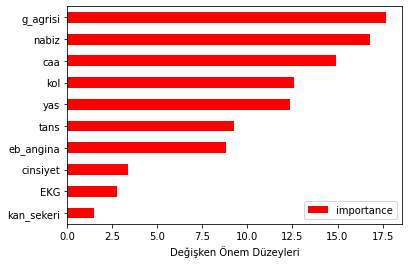

In [88]:
importance3 = pd.DataFrame({"importance" : rf.feature_importances_*100},
                         index = X_train.columns)
importance3.sort_values(by = "importance",
                      axis = 0,
                      ascending = True).plot(kind = "barh", color = "r")
plt.xlabel("Değişken Önem Düzeyleri")
plt.show()

### K Nearest Neighbors

In [31]:
knn = KNeighborsClassifier()

In [32]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [33]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [34]:
y_pred4 = knn.predict(X_test)
cm4 = confusion_matrix(y_test, y_pred4)
cm4

array([[24,  7],
       [ 3, 27]], dtype=int64)

In [35]:
acc4 = accuracy_score(y_test, y_pred4)
print("Accuracy Score= %{}".format(acc4*100))

Accuracy Score= %83.60655737704919


#### 530-4.30 KNN Validasyon

### Support Vector Machine

In [36]:
svm = svm.SVC()

In [37]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [38]:
svm.fit(X_train, y_train)

SVC()

In [39]:
y_pred5 = svm.predict(X_test)
cm5 = confusion_matrix(y_test, y_pred5)
cm5

array([[21, 10],
       [ 4, 26]], dtype=int64)

In [40]:
acc5 = accuracy_score(y_test, y_pred5)
print("Accuracy Score= %{}".format(acc5*100))

Accuracy Score= %77.04918032786885


In [86]:
svm.feature_names_in_

array(['yas', 'cinsiyet', 'g_agrisi', 'tans', 'kol', 'kan_sekeri', 'EKG',
       'nabiz', 'eb_angina', 'caa'], dtype=object)

## AdaBoost

In [41]:
adab = AdaBoostClassifier()

In [42]:
adab.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [43]:
adab.fit(X_train, y_train)

AdaBoostClassifier()

In [44]:
y_pred6 = adab.predict(X_test)
cm6 = confusion_matrix(y_test, y_pred6)
cm6

array([[24,  7],
       [ 3, 27]], dtype=int64)

In [45]:
acc6 = accuracy_score(y_test, y_pred6)
print("Accuracy Score= %{}".format(acc6*100))

Accuracy Score= %83.60655737704919


#### Önem Düzeyleri

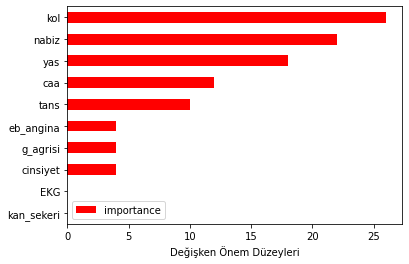

In [83]:
importance6 = pd.DataFrame({"importance" : adab.feature_importances_*100},
                         index = X_train.columns)
importance6.sort_values(by = "importance",
                      axis = 0,
                      ascending = True).plot(kind = "barh", color = "r")
plt.xlabel("Değişken Önem Düzeyleri")
plt.show()

### XGBoost

In [46]:
xgb = XGBClassifier()

In [47]:
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [48]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [49]:
y_pred7 = xgb.predict(X_test)
cm7 = confusion_matrix(y_test, y_pred7)
cm7

array([[22,  9],
       [ 3, 27]], dtype=int64)

In [50]:
acc7 = accuracy_score(y_test, y_pred7)
print("Accuracy Score= %{}".format(acc7*100))

Accuracy Score= %80.32786885245902


#### Önem Düzeyleri

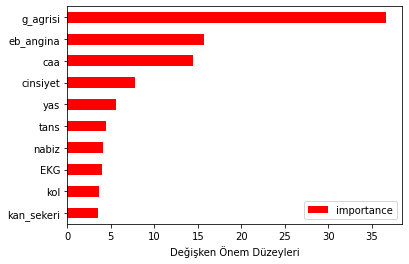

In [81]:
importance7 = pd.DataFrame({"importance" : xgb.feature_importances_*100},
                         index = X_train.columns)
importance7.sort_values(by = "importance",
                      axis = 0,
                      ascending = True).plot(kind = "barh", color = "r")
plt.xlabel("Değişken Önem Düzeyleri")
plt.show()

### Validasyon Öncesi Tahmin Başarıları

In [51]:
model_acc = pd.DataFrame({"Model" : ["Logistic Regression", "Decision Tree", "Random Forest", "KNN", "SVM", "AdaBoost", "XGBoost"],
                         "Accuracy" : [round(acc1*100), round(acc2*100), round(acc3*100), round(acc4*100), round(acc5*100), round(acc6*100), round(acc7*100)]})
model_acc = model_acc.sort_values("Accuracy", ascending = False).reset_index()
model_acc.drop("index", axis = 1)

,Model,Accuracy
0,Logistic Regression,85.245902
1,KNN,83.606557
2,AdaBoost,83.606557
3,XGBoost,80.327869
4,Random Forest,77.049180
5,SVM,77.049180
6,Decision Tree,73.770492


### Validasyon Sonrası Tahmin Başarıları

In [52]:
model_acc2 = pd.DataFrame({"Model" : ["Logistic Regression", "Decision Tree", "Random Forest", "KNN", "SVM", "AdaBoost", "XGBoost"],
                         "Accuracy" : [acc12*100, acc22*100, acc32*100, acc42*100, acc52*100, acc62*100, acc72*100]})
model_acc2 = model_acc.sort_values("Accuracy", ascending = False).reset_index()
model_acc2.drop("index", axis = 1)

NameError: name 'acc12' is not defined